# ANALISIS PREDICTIVO DE LAS ACCIONES DE **WALMEX**

Este proyecto se baso usando la metodologia CRISP-DM para la predicción de series temporales financieras utilizando un modelo SARIMA.


Metodologia CRISP-DM del proyecto:

1. **Comprensión del Negocio**
 El objetivo principal es desarrollar un ***modelo predictivo que pueda predecir con precisión los precios de cierre futuros de las acciones***. Esto puede ayudar en la toma de decisiones de inversión, la gestión de riesgos o proporcionar insights sobre el comportamiento del mercado.


2. **Comprensión de los Datos**
Recopilar datos históricos de precios de acciones que incluyan características como el precio de apertura, el máximo, el mínimo, el cierre, el volumen de operaciones, etc.
Realizar un análisis exploratorio para entender la naturaleza de los datos, identificar patrones, tendencias, estacionalidad y otros factores que podrían influir en los precios de las acciones.


3. **Preparación de los Datos**
Tratar con valores faltantes, eliminar duplicados, y realizar cualquier transformación necesaria para que los datos estén listos para el modelado.
Crear nuevas variables, como medias móviles o indicadores técnicos (por ejemplo, EMA, RSI), que puedan ser relevantes para el modelo.


4. **Modelado**
Elegir SARIMA como la técnica de modelado principal debido a su efectividad en series temporales con tendencias y estacionalidad.
Desarrollar modelos SARIMA utilizando diferentes configuraciones de parámetros y dividir los datos en conjuntos de entrenamiento y prueba para validar el rendimiento del modelo.


5. **Evaluación**
Utilizar métricas como el RMSE para evaluar el rendimiento del modelo en el conjunto de datos de prueba.
Revisar todo el proceso de modelado y evaluación para asegurarse de que cumple con los objetivos del negocio y que se han considerado todas las variables importantes.


6. **Despliegue**
Desarrollar un plan para implementar el modelo en un entorno de producción, lo que podría incluir la integración con sistemas existentes o la creación de una interfaz de usuario para acceder a las predicciones.
Establecer un sistema para monitorear el rendimiento del modelo a lo largo del tiempo y actualizarlo cuando sea necesario para adaptarse a los cambios en el mercado.

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv("/content/dataset_yahoof (1).csv")

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
0,74.820000,74.900002,72.769997,72.769997,72.007423,5278380
1,73.389999,75.000000,72.410004,73.279999,72.512077,8873146
2,73.870003,74.230003,72.500000,72.500000,71.740250,7857193
3,72.870003,73.570000,72.559998,72.599998,71.839203,16874963
4,72.900002,72.900002,70.599998,70.599998,69.860161,15280294
...,...,...,...,...,...,...
246,68.870003,68.870003,66.220001,66.519997,66.519997,17128684
247,66.650002,68.440002,66.610001,67.160004,67.160004,13313654
248,67.199997,67.519997,66.330002,67.099998,67.099998,9993722
249,66.510002,68.389999,65.809998,68.379997,68.379997,33126663


In [ ]:
df.shape

(251, 6)

In [ ]:
#Plotting de como se ve el precio de cierre de la accion de WALMEX a tiempos actuales

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines+markers', name='Precio de cierre',
                         hoverinfo='y', text=df['Close']))

fig.update_layout(
    title='Precio de cierre de WALMEX - Último año',
    xaxis_title='Fecha',
    yaxis_title='Precio',
    legend_title='Leyenda'
)

fig.show()

In [ ]:
#Calculo de la EMA a 20 dias
df['EMA_20'] = df['Adj Close'].ewm(span=20, adjust=False).mean()

In [ ]:
#Grafica de como se ve el precio de cierre de la accion y la EMA

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Precio Cierre'))

fig.add_trace(go.Scatter(x=df.index, y=df['EMA_20'], mode='lines', name='EMA 20 días'))

fig.update_layout(
    title='Precio de cierre y EMA de 20 días - WALMEX',
    xaxis_title='Fecha',
    yaxis_title='Precio',
    legend_title='Leyenda',
    hovermode='x'
)

fig.show()

# ***INDICADORES TECNICOS***

In [ ]:
# Medias Móviles: SMA
for window in [10, 20, 50]:
    df[f'SMA_{window}'] = df['Close'].rolling(window=window).mean()


# MACD
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']

# RSI
delta = df['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Bandas de Bollinger
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['STD_20'] = df['Close'].rolling(window=20).std()
df['Bollinger_Upper'] = df['SMA_20'] + (df['STD_20'] * 2)
df['Bollinger_Lower'] = df['SMA_20'] - (df['STD_20'] * 2)

# Eliminar posibles NaN creados por las medias móviles
df.dropna(inplace=True)


# ***CALCULO DE NUMEROS NEGATIVO***

In [ ]:
#Calculo de numeros negativos para saber en que momento es bueno entrar a la accion

df['Variacion_PP_negativa'] = ((df['Close'] - df['EMA_20']) / df['EMA_20']) * 100

# Crear la variable 'variacion_negativa' que almacene la variación cuando es negativa
df['variacion_negativa'] = df['Variacion_PP_negativa'].apply(lambda x: x if x < 0 else None)

for index, value in enumerate(df['variacion_negativa']):
    if value is not None:  # Solo imprimimos las filas con variación negativa
        print(f"Row {index + 1}: {value:.2f}%")


Row 1: -1.54%
Row 2: -0.37%
Row 3: -0.49%
Row 4: -1.02%
Row 5: -1.22%
Row 6: -1.39%
Row 7: nan%
Row 8: -0.24%
Row 9: -0.05%
Row 10: nan%
Row 11: nan%
Row 12: nan%
Row 13: nan%
Row 14: nan%
Row 15: nan%
Row 16: nan%
Row 17: nan%
Row 18: nan%
Row 19: nan%
Row 20: nan%
Row 21: nan%
Row 22: nan%
Row 23: -0.69%
Row 24: nan%
Row 25: nan%
Row 26: nan%
Row 27: nan%
Row 28: nan%
Row 29: nan%
Row 30: nan%
Row 31: nan%
Row 32: nan%
Row 33: nan%
Row 34: -0.36%
Row 35: -1.77%
Row 36: -1.35%
Row 37: -0.49%
Row 38: -0.44%
Row 39: -1.11%
Row 40: -1.02%
Row 41: -1.33%
Row 42: -1.39%
Row 43: -1.48%
Row 44: -0.65%
Row 45: nan%
Row 46: nan%
Row 47: nan%
Row 48: nan%
Row 49: nan%
Row 50: nan%
Row 51: nan%
Row 52: nan%
Row 53: nan%
Row 54: nan%
Row 55: nan%
Row 56: nan%
Row 57: nan%
Row 58: nan%
Row 59: nan%
Row 60: nan%
Row 61: nan%
Row 62: -0.40%
Row 63: -0.70%
Row 64: -0.43%
Row 65: -2.58%
Row 66: -1.25%
Row 67: -2.11%
Row 68: -2.56%
Row 69: -3.98%
Row 70: -3.42%
Row 71: -3.82%
Row 72: -4.75%
Row 73: -5.

In [ ]:
# Seleccion de solo los valores negativos
datos_negativos = df[df['variacion_negativa'] < 0]

print(datos_negativos[['Close', 'EMA_20', 'Variacion_PP_negativa', 'variacion_negativa']])

         Close     EMA_20  Variacion_PP_negativa  variacion_negativa
49   70.709999  71.813313              -1.536364           -1.536364
50   71.440002  71.706460              -0.371596           -0.371596
51   71.239998  71.590936              -0.490199           -0.490199
52   70.709999  71.436467              -1.016942           -1.016942
53   70.400002  71.267495              -1.217236           -1.217236
..         ...        ...                    ...                 ...
222  59.580002  62.464275              -4.617476           -4.617476
223  60.299999  62.258153              -3.145217           -3.145217
224  60.009998  62.044043              -3.278389           -3.278389
225  60.470001  61.894135              -2.300918           -2.300918
246  66.519997  67.025994              -0.754927           -0.754927

[109 rows x 4 columns]


In [ ]:
# Promedio simple usando los valores negativos obtenidos
promedio_negativos = df[df['variacion_negativa'] < 0]['variacion_negativa'].mean()

print(f"El promedio simple de los valores negativos es: {promedio_negativos}%")

El promedio simple de los valores negativos es: -1.756500492511185%


In [ ]:
# Seleccion de los valores negativos que son menores (mayores) al promedio obtenido previamente
datos_muy_negativos = df[df['variacion_negativa'] < promedio_negativos]

print(datos_muy_negativos[['Close', 'EMA_20', 'Variacion_PP_negativa', 'variacion_negativa']])

         Close     EMA_20  Variacion_PP_negativa  variacion_negativa
83   70.430000  71.698210              -1.768816           -1.768816
113  70.419998  72.285603              -2.580880           -2.580880
115  70.510002  72.030709              -2.111193           -2.111193
116  70.000000  71.837308              -2.557596           -2.557596
117  68.690002  71.537565              -3.980513           -3.980513
118  68.839996  71.280654              -3.424011           -3.424011
119  68.279999  70.994877              -3.824048           -3.824048
120  67.290001  70.642032              -4.745094           -4.745094
121  66.660004  70.262791              -5.127589           -5.127589
122  67.230003  69.973954              -3.921388           -3.921388
126  68.220001  69.678443              -2.093103           -2.093103
127  67.430000  69.464305              -2.928562           -2.928562
128  66.989998  69.228657              -3.233718           -3.233718
129  66.720001  68.989738         

In [ ]:
# Encontrar el valor negativo más bajo y el más alto
valor_minimo = datos_muy_negativos['variacion_negativa'].min()
valor_maximo = datos_muy_negativos['variacion_negativa'].max()

# Calcular el promedio entre el valor más bajo y el más alto
promedio_extremos = (valor_minimo + valor_maximo) / 2

print(f"El valor negativo más bajo es: {valor_minimo}%")
print(f"El valor negativo más alto es: {valor_maximo}%")
print(f"El promedio entre el valor más bajo y el más alto es: {promedio_extremos}%")

El valor negativo más bajo es: -7.109722035032075%
El valor negativo más alto es: -1.7688160332774476%
El promedio entre el valor más bajo y el más alto es: -4.439269034154761%


In [ ]:
# Seleccion de los valores negativos que son menores (mayores) al promedio obtenido previamente
data_menor_que_promedio = df[df['Variacion_PP_negativa'] < promedio_extremos]

print(data_menor_que_promedio[['Close', 'EMA_20', 'Variacion_PP_negativa', 'variacion_negativa']])

         Close     EMA_20  Variacion_PP_negativa  variacion_negativa
120  67.290001  70.642032              -4.745094           -4.745094
121  66.660004  70.262791              -5.127589           -5.127589
197  63.439999  66.629129              -4.786391           -4.786391
213  60.619999  65.259788              -7.109722           -7.109722
215  61.759998  64.693840              -4.534964           -4.534964
216  61.389999  64.379189              -4.643099           -4.643099
217  59.930000  63.955457              -6.294156           -6.294156
219  60.070000  63.319546              -5.131980           -5.131980
222  59.580002  62.464275              -4.617476           -4.617476


# ***CALCULO DE NUMEROS POSITIVOS***

In [ ]:
# Calculo de numeros positivos para saber en que momento es bueno entrar a la accion

df['Variacion_PP_positiva'] = ((df['Close'] - df['EMA_20']) / df['EMA_20']) * 100

# Crear la variable 'variacion_positiva' que almacene la variación cuando es positiva
df['variacion_positiva'] = df['Variacion_PP_positiva'].apply(lambda x: x if x > 0 else None)

for index, value in enumerate(df['variacion_positiva']):
    if value is not None:  # Solo imprimimos las filas con variación positiva
        print(f"Row {index + 1}: {value:.2f}%")

Row 1: nan%
Row 2: nan%
Row 3: nan%
Row 4: nan%
Row 5: nan%
Row 6: nan%
Row 7: 1.45%
Row 8: nan%
Row 9: nan%
Row 10: 1.32%
Row 11: 1.56%
Row 12: 0.27%
Row 13: 0.50%
Row 14: 2.01%
Row 15: 2.72%
Row 16: 1.91%
Row 17: 1.82%
Row 18: 1.16%
Row 19: 3.66%
Row 20: 2.99%
Row 21: 3.48%
Row 22: 2.35%
Row 23: nan%
Row 24: 0.91%
Row 25: 1.16%
Row 26: 1.09%
Row 27: 1.74%
Row 28: 2.09%
Row 29: 2.71%
Row 30: 1.69%
Row 31: 1.86%
Row 32: 0.03%
Row 33: 0.50%
Row 34: nan%
Row 35: nan%
Row 36: nan%
Row 37: nan%
Row 38: nan%
Row 39: nan%
Row 40: nan%
Row 41: nan%
Row 42: nan%
Row 43: nan%
Row 44: nan%
Row 45: 0.17%
Row 46: 1.01%
Row 47: 1.92%
Row 48: 1.06%
Row 49: 0.77%
Row 50: 1.39%
Row 51: 0.98%
Row 52: 0.45%
Row 53: 0.27%
Row 54: 1.07%
Row 55: 1.23%
Row 56: 2.27%
Row 57: 3.67%
Row 58: 2.42%
Row 59: 2.06%
Row 60: 0.10%
Row 61: 0.25%
Row 62: nan%
Row 63: nan%
Row 64: nan%
Row 65: nan%
Row 66: nan%
Row 67: nan%
Row 68: nan%
Row 69: nan%
Row 70: nan%
Row 71: nan%
Row 72: nan%
Row 73: nan%
Row 74: nan%
Row 75

In [ ]:
# Seleccionar solo los valores positivos
datos_positivos = df[df['variacion_positiva'] > 0]

print(datos_positivos[['Close', 'EMA_20', 'Variacion_PP_positiva', 'variacion_positiva']])

         Close     EMA_20  Variacion_PP_positiva  variacion_positiva
55   72.150002  71.115636               1.454483            1.454483
58   71.889999  70.956443               1.315675            1.315675
59   72.099998  70.993395               1.558741            1.558741
60   71.129997  70.935415               0.274308            0.274308
61   71.250000  70.894266               0.501781            0.501781
..         ...        ...                    ...                 ...
245  69.620003  67.079257               3.787677            3.787677
247  67.160004  67.038757               0.180861            0.180861
248  67.099998  67.044589               0.082645            0.082645
249  68.379997  67.171771               1.798711            1.798711
250  67.330002  67.186841               0.213079            0.213079

[93 rows x 4 columns]


In [ ]:
# Calculo del promedio simple de los numeros positivos
promedio_positivos = df[df['variacion_positiva'] > 0]['variacion_positiva'].mean()

print(f"El promedio simple de los valores positivos es: {promedio_positivos:.2f}%")

El promedio simple de los valores positivos es: 1.73%


In [ ]:
# Seleccionar valores que son más positivos que el promedio
datos_muy_positivos = df[df['variacion_positiva'] > promedio_positivos]

print(datos_muy_positivos[['Close', 'EMA_20', 'Variacion_PP_positiva', 'variacion_positiva']])

         Close     EMA_20  Variacion_PP_positiva  variacion_positiva
62   72.389999  70.964470               2.008793            2.008793
63   73.019997  71.087359               2.718680            2.718680
64   72.510002  71.150482               1.910767            1.910767
65   72.500000  71.206650               1.816333            1.816333
67   74.019997  71.407472               3.658615            3.658615
68   73.690002  71.551311               2.989031            2.989031
69   74.230003  71.732341               3.481919            3.481919
70   73.519997  71.829219               2.353886            2.353886
75   73.000000  71.748657               1.744064            1.744064
76   73.330002  71.826076               2.093844            2.093844
77   73.900002  71.949838               2.710448            2.710448
79   73.400002  72.057172               1.863561            1.863561
95   72.599998  71.235237               1.915852            1.915852
104  73.580002  71.950084         

In [ ]:
# Encontrar el valor positivo más bajo y el más alto de los positivos
valor_minimo_positivo = datos_muy_positivos['variacion_positiva'].min()
valor_maximo_positivo = datos_muy_positivos['variacion_positiva'].max()

# Calcular el promedio entre el valor más bajo y el más alto
promedio_extremos_positivos = (valor_minimo_positivo + valor_maximo_positivo) / 2

print(f"El valor positivo más bajo es: {valor_minimo_positivo:}%")
print(f"El valor positivo más alto es: {valor_maximo_positivo:}%")
print(f"El promedio entre el valor más bajo y el más alto es: {promedio_extremos_positivos}%")

El valor positivo más bajo es: 1.7440640716630138%
El valor positivo más alto es: 6.8307680861904405%
El promedio entre el valor más bajo y el más alto es: 4.287416078926727%


In [ ]:
# Seleccion de los valores negativos que son menores (mayores) al promedio obtenido previamente
data_mayor_que_promedio = df[df['Variacion_PP_positiva'] > promedio_extremos_positivos]

print(data_mayor_que_promedio[['Close', 'EMA_20', 'Variacion_PP_positiva', 'variacion_positiva']])

         Close     EMA_20  Variacion_PP_positiva  variacion_positiva
227  66.589996  62.524540               6.502177            6.502177
231  66.820000  63.489613               5.245562            5.245562
232  66.949997  63.819173               4.905773            4.905773
238  69.580002  65.131051               6.830768            6.830768
239  68.769997  65.477617               5.028252            5.028252
243  69.790001  66.502527               4.943382            4.943382
244  69.750000  66.811810               4.397710            4.397710


# ***VISUALIZACION DE PRECIO, LA EMA Y LOS POSIBLES PUNTOS DE ENTRADA Y SALILDA***

**En este paso se muestra una grafica con el preio de 'Cierre' de la accion de WALMEX junto con la linea roja que representa la EMA.**


*Se añaden unos marcadores de color rojo que son los JUMP IN - Jump in es el momento optimo para entrar a una accion. Este momento optimo sucede cuando el precio de la accion (Linea azul) esta por debajo de la EMA (Linea Roja). Esto fue obtenido anteriormente con el promedio del valor mas alto y mas bajo de los numeros negativos, el cual fue: -4.439269034154761%*

--------------------------------------------------------------------------------

*Se añaden unos marcadores de color verde que son los JUMP OUT - Jump out es el momento optimo para salir, esto es determinado por el por el promedio entre el mas alto y el mas bajo entre los positivos el cual fue 4.287416078926727%. Esto sucede cuando la el precio de la accion pasa por encima de la EMA*

In [ ]:
fig = go.Figure()

# Agregar la línea del precio de cierre
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Precio de Cierre'))

# Agregar la línea de la EMA de 20 días
fig.add_trace(go.Scatter(x=df.index, y=df['EMA_20'], mode='lines', name='EMA 20 días'))

# Agregar marcadores para los puntos donde la variación es mayor que el promedio extremo positivo
fig.add_trace(go.Scatter(
    x=data_mayor_que_promedio.index,
    y=data_mayor_que_promedio['Close'],
    mode='markers',
    name='Jump Out',
    marker=dict(color='green', size=10)))

# Agregar marcadores para los puntos donde la variación es menor que el promedio extremo negativo
fig.add_trace(go.Scatter(
    x=data_menor_que_promedio.index,
    y=data_menor_que_promedio['Close'],
    mode='markers',
    name='Jump In',
    marker=dict(color='red', size=10)))

fig.update_layout(
    title='Precio de Cierre, EMA de 20 días y Variaciones Extremas - WALMEX',
    xaxis_title='Fecha',
    yaxis_title='Precio',
    legend_title='Leyenda',
    hovermode='x unified'
)

fig.show()

# ***CALCULO DEL STOP LOSS Y TAKE PROFIT***

**En esta parte del proyecto de calcula el 'Stop Loss' y el 'Take profit'**

*Tanto el stop loss como el take profit se consideran escudos*

El stop loss es un escudo cuando el precio de la accion no logra levantase. Este seria como un caso en el que se tiene que asumir perdida, sin embargo, es una perdida que se tiene que asumir

-------------------------------------------------------------------------------

Take profit, es otro escudo, cuando el Jump out te dice que te salas, y tu consideras que va a subir, tienes un respaldo de cuando puede bajar el precio y aun asi tendrias ganancia, pero eso ya es decision propia

In [ ]:
# Calcular el stop loss y el take profit
df['Stop_Loss'] = df['Close'] * (1 - abs(promedio_extremos) / 100)
df['Take_Profit'] = df['Close'] * (1 + abs(promedio_extremos_positivos) / 100)

# Mostrar los resultados
print(df[['Close', 'Stop_Loss', 'Take_Profit']].head())

        Close  Stop_Loss  Take_Profit
49  70.709999  67.570992    73.741631
50  71.440002  68.268589    74.502933
51  71.239998  68.077463    74.294353
52  70.709999  67.570992    73.741631
53  70.400002  67.274756    73.418343


In [ ]:
import plotly.graph_objects as go

# Suponiendo que ya tienes calculado df, promedio_extremos y promedio_extremos_positivos
df['Stop_Loss'] = df['Close'] * (1 - abs(promedio_extremos) / 100)
df['Take_Profit'] = df['Close'] * (1 + abs(promedio_extremos_positivos) / 100)

# Crear la figura
fig = go.Figure()

# Agregar la línea del precio de cierre
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Precio de Cierre'))

# Agregar la línea de la EMA de 20 días
fig.add_trace(go.Scatter(x=df.index, y=df['EMA_20'], mode='lines', name='EMA 20 días'))

# Agregar la línea de Stop Loss
fig.add_trace(go.Scatter(x=df.index, y=df['Stop_Loss'], mode='lines', name='Stop Loss', line=dict(color='red', dash='dot')))

# Agregar la línea de Take Profit
fig.add_trace(go.Scatter(x=df.index, y=df['Take_Profit'], mode='lines', name='Take Profit', line=dict(color='green', dash='dot')))

# Agregar marcadores para los puntos donde la variación es mayor que el promedio extremo positivo
# Asegúrate de tener definido data_mayor_que_promedio correctamente
fig.add_trace(go.Scatter(
    x=data_mayor_que_promedio.index,
    y=data_mayor_que_promedio['Close'],
    mode='markers',
    name='Take Profit',
    marker=dict(color='green', size=10)))

# Agregar marcadores para los puntos donde la variación es menor que el promedio extremo negativo
# Asegúrate de tener definido data_menor_que_promedio correctamente
fig.add_trace(go.Scatter(
    x=data_menor_que_promedio.index,
    y=data_menor_que_promedio['Close'],
    mode='markers',
    name='Stop Loss',
    marker=dict(color='red', size=10)))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Precio de Cierre, EMA de 20 días, Stop Loss, Take Profit y Variaciones Extremas - WALMEX',
    xaxis_title='Fecha',
    yaxis_title='Precio',
    legend_title='Leyenda',
    hovermode='x unified'
)

# Mostrar la figura
fig.show()


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA_20,SMA_10,SMA_20,SMA_50,...,RSI,STD_20,Bollinger_Upper,Bollinger_Lower,Variacion_PP_negativa,variacion_negativa,Variacion_PP_positiva,variacion_positiva,Stop_Loss,Take_Profit
49,71.500000,71.839996,70.180000,70.709999,69.969009,15600213,71.813313,72.298999,73.307000,72.072800,...,26.700484,1.784192,76.875385,69.738616,-1.536364,-1.536364,-1.536364,NaN,67.570992,73.741631
50,70.930000,71.739998,70.410004,71.440002,70.691360,15056248,71.706460,72.087999,73.290501,72.046200,...,25.796519,1.800605,76.891710,69.689292,-0.371596,-0.371596,-0.371596,NaN,68.268589,74.502933
51,71.739998,72.339996,70.540001,71.239998,70.493454,8618091,71.590936,71.723999,73.264500,72.005400,...,25.823044,1.827422,76.919345,69.609656,-0.490199,-0.490199,-0.490199,NaN,68.077463,74.294353
52,71.239998,71.419998,70.010002,70.709999,69.969009,14022935,71.436467,71.504999,73.160000,71.969600,...,25.849644,1.913130,76.986261,69.333740,-1.016942,-1.016942,-1.016942,NaN,67.570992,73.741631
53,70.970001,71.190002,70.309998,70.400002,69.662262,1154792,71.267495,71.260999,72.984500,71.925600,...,23.678871,1.999742,76.983983,68.985017,-1.217236,-1.217236,-1.217236,NaN,67.274756,73.418343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,68.870003,68.870003,66.220001,66.519997,66.519997,17128684,67.025994,68.453000,67.145499,64.877999,...,48.683405,1.753840,70.653179,63.637820,-0.754927,-0.754927,-0.754927,NaN,63.566995,69.371986
247,66.650002,68.440002,66.610001,67.160004,67.160004,13313654,67.038757,68.547000,67.174000,64.952400,...,53.653980,1.748962,70.671924,63.676076,0.180861,NaN,0.180861,0.180861,64.178590,70.039432
248,67.199997,67.519997,66.330002,67.099998,67.099998,9993722,67.044589,68.299000,67.288000,64.996000,...,54.748233,1.659466,70.606932,63.969067,0.082645,NaN,0.082645,0.082645,64.121249,69.976855
249,66.510002,68.389999,65.809998,68.379997,68.379997,33126663,67.171771,68.260000,67.477000,65.048800,...,61.648938,1.548776,70.574551,64.379448,1.798711,NaN,1.798711,1.798711,65.344425,71.311732


# ***ENTRENAMIENTO***

Para el entrenamiento se uso dividieron los datos para poder ajustar el modelo que se llama SARIMA (SEASONAL AUTOAGRESIVE INTEGRATED MOVING AVERAGE).

Este modelo es usado para series temporales como las de este proyecto, exhibiendo patrones temporales, asi como tendencias.

Se uso este modelo ya que para datos financieros, como los precios de la accion, suelen tener tendencias que son bien manejados por SARIMA

In [ ]:
df.index = pd.date_range(start='2020-01-01', periods=len(df), freq='D')

In [ ]:
# División de los datos
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

# Ajuste del modelo SARIMA
import statsmodels.api as sm

p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

modelo_sarima = sm.tsa.statespace.SARIMAX(train_df['Close'],
                                          order=(p, d, q),
                                          seasonal_order=(P, D, Q, S),
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
resultados_sarima = modelo_sarima.fit()

# Predicciones
predicciones = resultados_sarima.forecast(steps=len(test_df))

# ***EVALUACION DEL MODELO***

Una vez evaluado, se calculo el RMSE que es el ROOT MEAN SQUARE ERROR utilizada para calcular metricas de error en series temporales.

En este caso tuve un RMSE de 3.834. Se mide en base al precio, es decir, si nuestro modelo predice que el precio de cierre de una acción será de 100, en promedio, el precio real podría estar en un rango de 96.166 a 103.834

Este error puede ser, bueno, malo o moderado dependiendo del precio de la accion que estes manejando.

En este caso nuestro margen de error puede ser considerado moderado, ni tan bueno ni tan malo

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_df['Close'], predicciones, squared=False)
print("RMSE: ", rmse)


RMSE:  3.8340419979764544


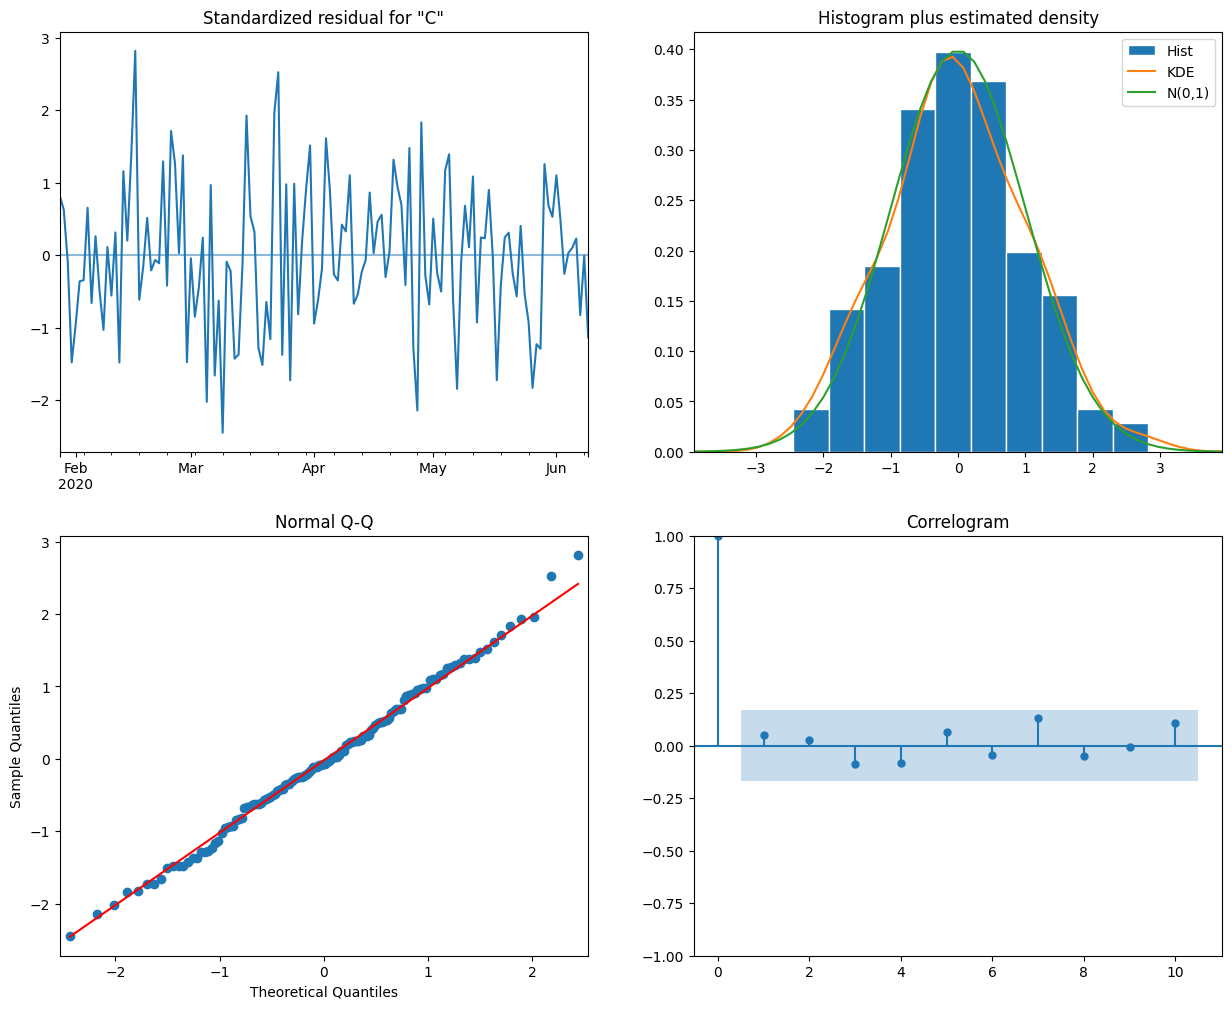

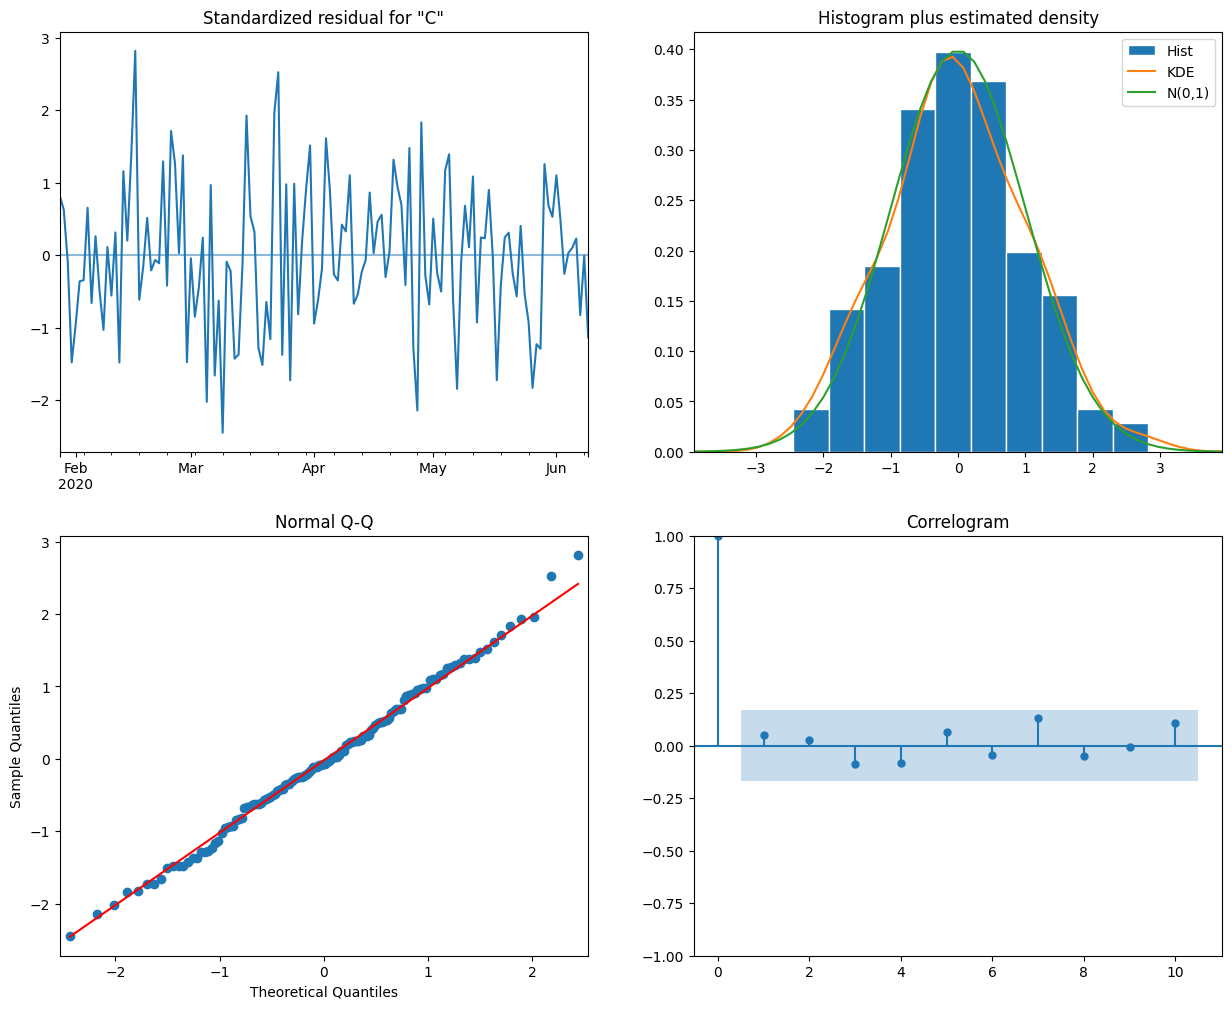

In [ ]:
resultados_sarima.plot_diagnostics(figsize=(15, 12))


# ***CONCLUSIONES***

Después de aplicar y evaluar nuestro modelo SARIMA en la predicción de los precios de cierre de las acciones de Walmex, que típicamente oscilan entre 70 pesos mexicanos, hemos obtenido un RMSE de 3.834. Este valor de RMSE indica que las predicciones de nuestro modelo, en promedio, se desvían del valor real en aproximadamente 3.834 pesos.

Por lo que se usaran mas modelos para comparar los resultados y ajustar el modelo para bajar de 3.8 pesos, ya que entre mas bajo mejor.

# ***Planes a futuro***


Se planea hacer un analisis de sentimiento asi como tambien una pagina web para facilitar el acceso y la comprension del mercado para aquellas personas que carenen de tiempo y/o conocimiento especializados.
 Establecer un sistema para monitorear el rendimiento del modelo a lo largo del tiempo y actualizarlo cuando sea necesario para adaptarse a los cambios en el mercado